In [1]:
%%time
from analysis_utils import *
import numpy as np
%load_ext autoreload
import pandas as pd
scalingFactor = 200
rxndiff=dict()

print('Starting scaling = ', scalingFactor)
NR_scaledrates = {'k1r':718*200/scalingFactor,'k2f':1475*200/scalingFactor,'k2r_nr':1120*200/scalingFactor,'k3_nr':6*200/scalingFactor,'k4':209*200/scalingFactor}


#Growth rate = 3.0
path = "/Users/Akshay/Documents/TranslationDynamics/data/"

gr_sim = dict()

data = "191003_2210/"
for i in range(1,7):
    sim_i = computeTransportRxnTimes(path+data, 1e15, 1e15, 100*(i-1),100*(i-1)+100,cogtRNANum=i, ribosomeNum = 7,scaling=scalingFactor, NR_scaling = NR_scaledrates)
    gr_sim[i] = (CellLatencies(sim_i))

data = "191105_0908/"
for i in range(7,14):
    sim_i = computeTransportRxnTimes(path+data, 1e15, 1e15, 100*(i-1-6),100*(i-1-6)+100,cogtRNANum=i, ribosomeNum = 7,scaling=scalingFactor, NR_scaling = NR_scaledrates)
    gr_sim[i] = (CellLatencies(sim_i))


gr_dict = {'gr_1':gr_sim}

def computedElongationLatency_gr3_v2(gr25_ptRNA,gr25_pCodon,gr_dict):
    import numpy as np

    transportRxnResults = transportRxnCalc(gr_dict,gr25_ptRNA,gr25_pCodon)

    search_list = transportRxnResults[0]
    rxndiff['30'] = transportRxnResults[1:]
    return([rxndiff[d][2][0]+(1000/1475+1000/1529+1000/209+1000/200+1000/32) for d in rxndiff],[rxndiff[d][5][0] for d in rxndiff])

Starting scaling =  200
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
CPU times: user 54.9 s, sys: 360 ms, total: 55.2 s
Wall time: 55.3 s


In [605]:
ptRNA_uniform = np.ones(len(gr25_ptRNA))/sum(np.ones(len(gr25_ptRNA)))
pCodon_uniform = np.ones(len(gr25_pCodon))/sum(np.ones(len(gr25_pCodon)))
elong_t, std = computedElongationLatency_gr3_v2(ptRNA_uniform,pCodon_uniform,gr_dict)
print(elong_t)

[211.818640298573]


In [606]:
ptRNA_uniform = np.ones(len(gr25_ptRNA))/sum(np.ones(len(gr25_ptRNA)))
pCodon_uniform = np.ones(len(gr25_pCodon))/sum(np.ones(len(gr25_pCodon)))
elong_t, std = computedElongationLatency_gr3_v2(gr25_ptRNA,pCodon_uniform,gr_dict)
print(elong_t)

[206.8949870205005]


In [607]:
ptRNA_uniform = np.ones(len(gr25_ptRNA))/sum(np.ones(len(gr25_ptRNA)))
pCodon_uniform = np.ones(len(gr25_pCodon))/sum(np.ones(len(gr25_pCodon)))
elong_t, std = computedElongationLatency_gr3_v2(ptRNA_uniform,gr25_pCodon,gr_dict)
print(elong_t)

[210.9215183490339]


In [238]:
#### tRNA shuffling

from analysis_utils import *
import numpy as np
%load_ext autoreload
import pandas as pd

elong_t_tRNA_list = list()
p_tRNA_list = list()
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)


for i in range(100):
    ptRNA_uniform = np.random.uniform(min(gr25_ptRNA),max(gr25_ptRNA),len(gr25_ptRNA))
    elong_t, std = computedElongationLatency_gr3_v2(ptRNA_uniform,gr25_pCodon,gr_dict);
    elong_t_tRNA_list.append(elong_t[0])
    p_tRNA_list.append(ptRNA_uniform)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


211.0440855767139 4.078545696247915
z-score:  6.042370838062546
p-value 7.593295686406417e-10


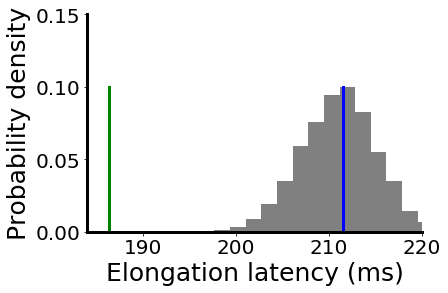

In [610]:
#### Plot tRNA shuffling
import matplotlib.pyplot as plt
import scipy.stats

p_tRNA_list=np.load('RandomtRNA_FixedCodon_10ksample_p_Codon_tRNA_list.npy')
elong_t_tRNA_list=np.load('RandomtRNA_FixedCodon_10ksample_elong_t_list.npy')

fig,ax = plt.subplots(1,1)
hist=ax.hist(elong_t_tRNA_list,20,color='grey',density=True)
ax.plot([186.4]*100,np.linspace(0,max(hist[0]),100),linewidth=3,color='green')
ax.plot([211.5]*100,np.linspace(0,max(hist[0]),100),linewidth=3,color='blue')

print(np.mean(elong_t_tRNA_list), np.std(elong_t_tRNA_list))
print('z-score: ', (np.mean(elong_t_tRNA_list)-186.4)/np.std(elong_t_tRNA_list))
print('p-value', scipy.stats.norm.sf(abs((np.mean(elong_t_tRNA_list)-186.4)/np.std(elong_t_tRNA_list))))
for _,axes in enumerate([ax]):
    axes.spines['left'].set_linewidth(3)
    axes.spines['bottom'].set_linewidth(3)
    axes.spines['top'].set_linewidth(0)
    axes.spines['right'].set_linewidth(0)
    axes.tick_params(axis='both', which='major', labelsize=20)
    ax.set_ylim(0,0.15)
    ax.set_xlim(184,220)
    ax.set_xlabel('Elongation latency (ms)',size=25)
    ax.set_ylabel('Probability density',size=25)

In [530]:
#### codon shuffling
from analysis_utils import *
import numpy as np
%load_ext autoreload
import pandas as pd

elong_t_list_codon_distrib = list()
p_Codon_list = list()
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)

for i in range(100):
    pCodon_uniform = np.random.uniform(min(gr25_Codon),max(gr25_Codon),len(gr25_Codon))
    elong_t, std = computedElongationLatency_gr3_v2(gr25_ptRNA,pCodon_uniform,gr_dict);
    elong_t_list_codon_distrib.append(elong_t[0])
    p_Codon_list.append(pCodon_uniform)
#np.save('FixedtRNA_RandomCodon_100sample_elong_t_list',elong_t_list_codon_distrib )
#np.save('FixedtRNA_RandomCodon_100sample_p_Codon_list',p_Codon_list )

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


206.291144758029 2.971071979444303
z-score:  6.694938694063327
p-value 1.0788103352318097e-11


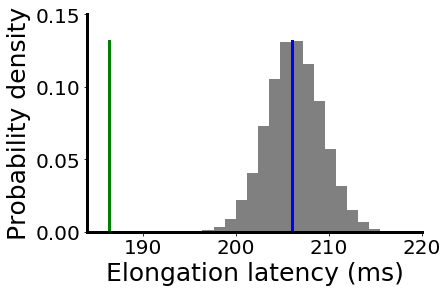

In [611]:
#### Plot codon shuffling
import matplotlib.pyplot as plt


p_tRNA_list=np.load('FixedtRNA_RandomCodon_10ksample_p_Codon_tRNA_list.npy')
elong_t_list_codon_distrib=np.load('FixedtRNA_RandomCodon_10ksample_elong_t_list.npy')
fig,ax = plt.subplots(1,1)
hist = ax.hist(elong_t_list_codon_distrib,color='grey', bins=20,density=True)
#hist = np.histogram(elong_t_list_codon_distrib,bins=20)
#ax.bar(hist[1][0:-1],hist[0]/sum(hist[0]),align='edge')
ax.plot([186.4]*100,np.linspace(0,max(hist[0]),100),linewidth=3,color='green')
ax.plot([206]*100,np.linspace(0,max(hist[0]),100),linewidth=3,color='blue')
print(np.mean(elong_t_list_codon_distrib), np.std(elong_t_list_codon_distrib))
print('z-score: ', (np.mean(elong_t_list_codon_distrib)-186.4)/np.std(elong_t_list_codon_distrib))
print('p-value', scipy.stats.norm.sf(abs((np.mean(elong_t_list_codon_distrib)-186.4)/np.std(elong_t_list_codon_distrib))))


for _,axes in enumerate([ax]):
    axes.spines['left'].set_linewidth(3)
    axes.spines['bottom'].set_linewidth(3)
    axes.spines['top'].set_linewidth(0)
    axes.spines['right'].set_linewidth(0)
    axes.tick_params(axis='both', which='major', labelsize=20)
    ax.set_ylim(0,0.15)
    ax.set_xlim(184,220)
    ax.set_xlabel('Elongation latency (ms)',size=25)
    ax.set_ylabel('Probability density',size=25)

In [668]:
#### tRNA & codon shuffling
from analysis_utils import *
import numpy as np
%load_ext autoreload
import pandas as pd

elong_t_list_codon_tRNA_distrib = list()
p_tRNA_list = list()
p_Codon_list = list()
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)
#combined_arr_list = list()
for i in range(100):
    pCodon_uniform = np.random.uniform(min(gr25_Codon),max(gr25_Codon),len(gr25_Codon))
    ptRNA_uniform = np.random.uniform(min(gr25_ptRNA),max(gr25_ptRNA),len(gr25_ptRNA))
    elong_t, std = computedElongationLatency_gr3_v2(ptRNA_uniform,pCodon_uniform,gr_dict);
    elong_t_list_codon_tRNA_distrib.append(elong_t[0])
    p_tRNA_list.append(ptRNA_uniform)
    p_Codon_list.append(pCodon_uniform)
    #combined_arr_list.append(np.append(np.array(ptRNA_uniform),np.array(pCodon_uniform)))

np.save('RandomtRNA_RandomCodon_100sample_elong_t_list',elong_t_list_codon_tRNA_distrib )
np.save('RandomtRNA_RandomCodon_100sample_p_Codon_list',p_Codon_list )
np.save('RandomtRNA_RandomCodon_100sample_p_tRNA_list',p_tRNA_list )

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


211.0583048364164 2.919491235038141
z-score:  8.446096546028592
p-value 1.506023124227507e-17


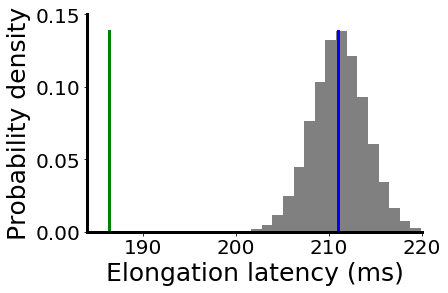

In [612]:
#### Plot tRNA+codon shuffling
import matplotlib.pyplot as plt


elong_t_list_codon_tRNA_distrib=np.load('RandomtRNA_RandomCodon_10ksample_elong_t_list.npy')
fig,ax = plt.subplots(1,1)
hist=ax.hist(elong_t_list_codon_tRNA_distrib,20,color='grey',density=True)
ax.plot([186.4]*100,np.linspace(0,max(hist[0]),100),linewidth=3,color='green')
ax.plot([211]*100,np.linspace(0,max(hist[0]),100),linewidth=3,color='blue')

print(np.mean(elong_t_list_codon_tRNA_distrib), np.std(elong_t_list_codon_tRNA_distrib))
print('z-score: ', (np.mean(elong_t_list_codon_tRNA_distrib)-186.4)/np.std(elong_t_list_codon_tRNA_distrib))
print('p-value', scipy.stats.norm.sf(abs((np.mean(elong_t_list_codon_tRNA_distrib)-186.4)/np.std(elong_t_list_codon_tRNA_distrib))))




for _,axes in enumerate([ax]):
    axes.spines['left'].set_linewidth(3)
    axes.spines['bottom'].set_linewidth(3)
    axes.spines['top'].set_linewidth(0)
    axes.spines['right'].set_linewidth(0)
    axes.tick_params(axis='both', which='major', labelsize=20)
    ax.set_ylim(0,0.15)
    ax.set_xlim(184,220)
    ax.set_xlabel('Elongation latency (ms)',size=25)
    ax.set_ylabel('Probability density',size=25)

In [31]:
import scipy.stats

#find p-value
scipy.stats.norm.sf((np.mean(elong_t_list_codon_tRNA_distrib)-186.4)/np.std(elong_t_list_codon_tRNA_distrib))

1.506023124227507e-17

In [455]:
###### Genetic algorithm for just tRNA shuffling ########

def run_ga_matchtRNA(gr25_Codon,elong_t_tRNA_list,p_tRNA_list,gr_dict,mintRNA,maxtRNA,p_tRNA_list_ref):
    #### Compute fitness
    fitness = [sum(np.abs(p_tRNA_list[i] - p_tRNA_list_ref)) for i in np.arange(len(p_tRNA_list))]

    #### Number of candidates n removing as well as n mating to create n offspring
    n = 10

    #### Identify the least fit candidates from the population
    cull_indices = np.argpartition(fitness, n)[-n:]
    #### Choose parents based on weighting fitness
    import random
    #parent_indices = np.array(random.choices(np.arange(len(p_tRNA_list)), fitness, k=10))
    parent_indices = np.argpartition(fitness, n)[:n]


    p_tRNA_list=np.array(p_tRNA_list)
    parents = p_tRNA_list[parent_indices]
    #### Mate k random pairs of 2 without replacement and renormalize
    k=5
    couples = np.random.choice(np.arange(len(parents)), size = (k,2),replace=False)
    recombination_rate = 0.1
    mutation_rate  = 0.05

    recombined_children = list()
    recombined_children_elongt = list()
    for couple_index in couples:
        couple = parents[couple_index]
        recombination_num = int(len(couple[0])*recombination_rate)
        recombination_locs = np.random.choice(len(couple[0]),recombination_num)
        recombination_values_0 = couple[0][recombination_locs] 
        couple[0][recombination_locs] = couple[1][recombination_locs]
        couple[1][recombination_locs] = recombination_values_0
        
        #### Mutate children
        mutation_num = int(len(couple[0])*mutation_rate)
        recombination_locs = np.random.choice(len(couple[0]),mutation_num)
        couple[0][recombination_locs] = np.random.uniform(mintRNA,maxtRNA,mutation_num)
        couple[1][recombination_locs] = np.random.uniform(mintRNA,maxtRNA,mutation_num)
        
        ### Re-normalize each recombined children
        child_0 = couple[0]/np.sum(couple[0])
        child_1 = couple[1]/np.sum(couple[1])

        #### Compute elong_t of the recombined children
        elong_t_0, std_0 = computedElongationLatency_gr3_v2(child_0,gr25_pCodon,gr_dict);
        elong_t_1, std_1 = computedElongationLatency_gr3_v2(child_1,gr25_pCodon,gr_dict);
                

        ### Add children to list as well as their elong_t
        recombined_children.append(list(child_0))
        recombined_children.append(list(child_1))
        recombined_children_elongt.append(elong_t_0[0])
        recombined_children_elongt.append(elong_t_1[0])

    #### Have recombined children and their elong_t replaced culled candidates
    p_tRNA_list[cull_indices] = recombined_children
    elong_t_tRNA_list[cull_indices] = recombined_children_elongt
    return fitness, p_tRNA_list, elong_t_tRNA_list

    

In [456]:
%%time
### Codon array fixed
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)
elong_t_tRNA_list = np.load('RandomtRNA_FixedCodon_100sample_elong_t_list.npy')
p_tRNA_list = np.load('RandomtRNA_FixedCodon_100sample_p_Codon_tRNA_list.npy')

fitness_arr = list()
minelong_arr = list()
for i in range(500):
    fitness, p_tRNA_list, elong_t_tRNA_list = run_ga_matchtRNA(gr25_Codon,elong_t_tRNA_list,p_tRNA_list,gr_dict,min(gr25_ptRNA),max(gr25_ptRNA),gr25_ptRNA)
    print(min(fitness))
    print(min(elong_t_tRNA_list))
    fitness_arr.append(min(fitness))
    minelong_arr.append(min(elong_t_tRNA_list))
#np.save('RandomtRNA_FixedCodon_500sample_optimizesame_elong_t_list2',elong_t_tRNA_list)
#np.save('RandomtRNA_FixedCodon_500sample_optimizesame_p_tRNA_list2',p_tRNA_list)
#np.save('minelong_arr2_dist',minelong_arr)
#np.save('min_fitness_dist',minelong_arr)

0.9651750845795982
200.67902537722506
0.614272532943319
200.67902537722506
0.614272532943319
199.75506614512028
0.614272532943319
199.75506614512028
0.5458408218395132
199.75506614512028
0.5458408218395132
199.75506614512028
0.5458408218395132
199.75506614512028
0.5458408218395132
200.36874919702345
0.5458408218395132
198.10627444132865
0.5249235820239201
198.10627444132865
0.5225466884467268
197.93816967753222
0.5173133108059933
197.93816967753222
0.5173133108059933
197.93816967753222
0.5173133108059933
197.93816967753222
0.5173133108059933
197.54378730549556
0.5130816094141721
197.54378730549556
0.5130816094141721
197.54378730549556
0.46966655828465714
196.8909266394599
0.46966655828465714
197.54378730549556
0.46966655828465714
197.54378730549556
0.46966655828465714
197.54378730549556
0.46966655828465714
197.54378730549556
0.46966655828465714
193.30006069469817
0.40906393984665873
193.30006069469817
0.40743027156875833
193.30006069469817
0.4019416043474118
193.13711165244774
0.393993

0.16348021584638434
183.47965555681978
0.16348021584638434
183.47965555681978
0.16348021584638434
183.47965555681978
0.16348021584638434
183.47965555681978
0.16348021584638434
183.47965555681978
0.16348021584638434
183.47965555681978
0.16348021584638434
183.47965555681978
0.16348021584638434
183.47965555681978
0.16348021584638434
183.47965555681978
0.16348021584638434
183.47965555681978
0.16348021584638434
183.47965555681978
0.16348021584638434
183.47965555681978
0.16110561179807065
183.47965555681978
0.16110561179807065
183.47965555681978
0.16110561179807065
183.47965555681978
0.16110561179807065
183.47965555681978
0.155002827948722
183.47965555681978
0.155002827948722
183.47965555681978
0.155002827948722
183.47965555681978
0.155002827948722
183.47965555681978
0.155002827948722
183.47965555681978
0.155002827948722
183.47965555681978
0.155002827948722
183.47965555681978
0.155002827948722
183.47965555681978
0.155002827948722
183.1184022257663
0.155002827948722
183.34593825736454
0.14410

0.09925524057699821
183.01654249726678
0.09925524057699821
183.01654249726678
0.09925524057699821
183.01654249726678
0.09925524057699821
183.01654249726678
0.09925524057699821
183.01654249726678
0.09761517421946345
183.01654249726678
0.09563324066429191
183.01654249726678
0.09563324066429191
183.01654249726678
0.09563324066429191
183.01654249726678
0.09563324066429191
183.01654249726678
0.09563324066429191
183.01654249726678
0.09563324066429191
183.01654249726678
0.09563324066429191
183.01654249726678
0.09563324066429191
183.01654249726678
0.09563324066429191
183.01654249726678
0.09563324066429191
183.01654249726678
0.09563324066429191
181.99603910989865
0.09563324066429191
183.01654249726678
0.09563324066429191
182.9510436708226
0.09563324066429191
183.01654249726678
0.09563324066429191
183.01654249726678
0.09239908230116572
183.01654249726678
0.09239908230116572
183.01654249726678
0.09239908230116572
183.01654249726678
0.09239908230116572
183.01654249726678
0.09239908230116572
183.01

[0.0608828  0.01065449 0.07458143 0.00608828 0.01065449 0.00608828
 0.02130898 0.04414003 0.02130898 0.01217656 0.01826484 0.08523592
 0.03196347 0.07305936 0.01217656 0.07153729 0.06392694 0.01674277
 0.00913242 0.02739726 0.01065449 0.0304414  0.01369863 0.0152207
 0.00761035 0.01065449 0.00761035 0.00304414 0.02130898 0.00456621
 0.01674277 0.01217656 0.00152207 0.00913242 0.01674277 0.01978691
 0.0152207  0.02739726 0.05936073 0.01978691]
[0.06123242 0.00981629 0.07746874 0.00722197 0.01780526 0.00479623
 0.02162919 0.04561267 0.02318606 0.01254851 0.01790484 0.08210164
 0.03170865 0.07682706 0.01538411 0.06779926 0.06058516 0.01423384
 0.01505342 0.02627364 0.00996699 0.03217424 0.0045351  0.01276812
 0.00783409 0.01432301 0.00957376 0.00300967 0.0184787  0.00887799
 0.01360292 0.00850082 0.00307484 0.00831545 0.01858219 0.01889345
 0.01124671 0.03083386 0.06054346 0.01567569]
normed tRNA dist  0.09674264424755832
[ 3.49616348e-04 -8.38201657e-04  2.88730560e-03  1.13369001e-03
  

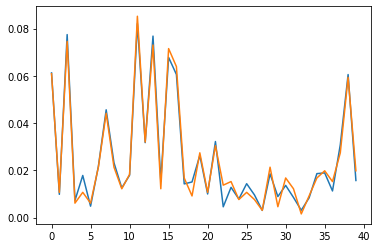

In [460]:
#plot frequency of tRNA vs. codon frequency plot for the new tRNA set vs old -- any new trends?
#validate genetic algorithm by optimizing for 0 distance w/ old set.
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)
p_tRNA_list=np.load('RandomtRNA_FixedCodon_500sample_optimizesame_p_tRNA_list.npy')
elong_t_tRNA_list=np.load('RandomtRNA_FixedCodon_500sample_optimizesame_elong_t_list.npy')


print(gr25_ptRNA)
print(p_tRNA_list[np.argmin(elong_t_tRNA_list)])

plt.plot(np.arange(40),p_tRNA_list[np.argmin(elong_t_tRNA_list)])
plt.plot(np.arange(40),gr25_ptRNA)

tRNA_dist = (p_tRNA_list[np.argmin(elong_t_tRNA_list)] - gr25_ptRNA)

tRNA_dist_norm = sum(np.abs(tRNA_dist)) ## Show plot of this too with epoch? With both fitness functions.

print('normed tRNA dist ', tRNA_dist_norm)
print(tRNA_dist)
print(sum(tRNA_dist))
print(np.min(elong_t_tRNA_list))

##I might have just shown that a greedy evolutionary search leads to 
## what's seen in cells, whereas a global search leads to deeper minima.
## I should run this for 1500 too, and also i need to measure the slope
## of both elong time and fitness w/ epoch --> supp fig or main fig.
# Or maybe this is just a control, since greedy is expected here?

In [ ]:
###### Genetic algorithm for just tRNA shuffling ########

def run_ga(gr25_Codon,elong_t_tRNA_list,p_tRNA_list,gr_dict,mintRNA,maxtRNA):
    
    #### Compute fitness
    fitness = (1/np.array(elong_t_tRNA_list))/sum((1/np.array(elong_t_tRNA_list)))

    #### Number of candidates n removing as well as n mating to create n offspring
    n = 10

    #### Identify the least fit candidates from the population
    cull_indices = np.argpartition(fitness, n)[:n]

    #### Choose parents based on weighting fitness
    import random
    #parent_indices = np.array(random.choices(np.arange(len(p_tRNA_list)), fitness, k=10))
    parent_indices = np.argpartition(fitness, n)[-n:]
    p_tRNA_list=np.array(p_tRNA_list)
    parents = p_tRNA_list[parent_indices]

    #### Mate k random pairs of 2 without replacement and renormalize
    k=5
    couples = np.random.choice(np.arange(len(parents)), size = (k,2),replace=False)
    recombination_rate = 0.1
    mutation_rate  = 0.05

    recombined_children = list()
    recombined_children_elongt = list()
    for couple_index in couples:
        couple = parents[couple_index]
        recombination_num = int(len(couple[0])*recombination_rate)
        recombination_locs = np.random.choice(len(couple[0]),recombination_num)
        recombination_values_0 = couple[0][recombination_locs] 
        couple[0][recombination_locs] = couple[1][recombination_locs]
        couple[1][recombination_locs] = recombination_values_0
        
        #### Mutate children
        mutation_num = int(len(couple[0])*mutation_rate)
        recombination_locs = np.random.choice(len(couple[0]),mutation_num)
        couple[0][recombination_locs] = np.random.uniform(mintRNA,maxtRNA,mutation_num)
        couple[1][recombination_locs] = np.random.uniform(mintRNA,maxtRNA,mutation_num)
        
        ### Re-normalize each recombined children
        child_0 = couple[0]/np.sum(couple[0])
        child_1 = couple[1]/np.sum(couple[1])

        #### Compute elong_t of the recombined children
        elong_t_0, std_0 = computedElongationLatency_gr3_v2(child_0,gr25_pCodon,gr_dict);
        elong_t_1, std_1 = computedElongationLatency_gr3_v2(child_1,gr25_pCodon,gr_dict);
                

        ### Add children to list as well as their elong_t
        recombined_children.append(list(child_0))
        recombined_children.append(list(child_1))
        recombined_children_elongt.append(elong_t_0[0])
        recombined_children_elongt.append(elong_t_1[0])

    #### Have recombined children and their elong_t replaced culled candidates
    p_tRNA_list[cull_indices] = recombined_children
    elong_t_tRNA_list[cull_indices] = recombined_children_elongt
    return fitness, p_tRNA_list, elong_t_tRNA_list

    

In [452]:
%%time
### Codon array fixed
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)
elong_t_tRNA_list = np.load('RandomtRNA_FixedCodon_100sample_elong_t_list.npy')
p_tRNA_list = np.load('RandomtRNA_FixedCodon_100sample_p_Codon_tRNA_list.npy')


fitness_arr = list()
minelong_arr = list()
for i in range(1500):
    fitness, p_tRNA_list, elong_t_tRNA_list = run_ga(gr25_Codon,elong_t_tRNA_list,p_tRNA_list,gr_dict,min(gr25_ptRNA),max(gr25_ptRNA))
    print(max(fitness))
    print(min(elong_t_tRNA_list))
    fitness_arr.append(max(fitness))
    minelong_arr.append(min(elong_t_tRNA_list))
#np.save('RandomtRNA_FixedCodon_1500sample_elong_t_list2',elong_t_tRNA_list)
#np.save('RandomtRNA_FixedCodon_1500sample_p_tRNA_list2',p_tRNA_list)
#np.save('minelong_arr2-tRNA',minelong_arr)

0.010488399408659985
200.67902537722506
0.010424971844655642
198.67654934306913
0.010481891073270494
198.58574082072516
0.01044415872824928
198.58574082072516
0.010414733565449533
198.58574082072516
0.01038875220851679
198.58574082072516
0.010363746839266169
198.58574082072516
0.010345956428326421
198.58574082072516
0.010326631710399646
198.58574082072516
0.010311092130059011
198.18607456751897
0.010310195056167263
198.18607456751897
0.010302209642477012
198.18607456751897
0.010286552241314422
198.18607456751897
0.010275870986330385
197.98726208381694
0.010272827952794732
197.98726208381694
0.010262672397538681
197.98726208381694
0.010253593160911024
197.98726208381694
0.010243164973584089
197.98726208381694
0.010234222160031685
195.47651262753993
0.010354316755169221
195.47651262753993
0.01033892295811787
195.47651262753993
0.010330249614087557
195.47651262753993
0.010319999841974806
195.47651262753993
0.010308118847126627
195.47651262753993
0.010292816689852767
195.47651262753993
0.0

0.010195894195218498
175.37952489549482
0.010188333327881778
175.37952489549482
0.010185791174254069
175.37952489549482
0.010183002166739456
175.37952489549482
0.010178177039923686
175.37952489549482
0.010175723046562014
175.37952489549482
0.010173755739886648
175.37952489549482
0.010170470151167448
175.36286207517938
0.010168171791006264
173.5399662175525
0.010262227268500906
173.5399662175525
0.010258411396346735
173.5399662175525
0.010252586954024007
173.5399662175525
0.01024987830411031
173.5399662175525
0.010244064521215105
173.5399662175525
0.010247575236371797
173.5399662175525
0.010236853231299012
173.5399662175525
0.010238702083074936
173.5399662175525
0.010237907463077081
173.5399662175525
0.010232308837598606
173.5399662175525
0.01022840511209265
173.5399662175525
0.010222296510007877
173.5399662175525
0.010221332908258107
173.5399662175525
0.01021629403117528
173.5399662175525
0.010221690545390311
173.5399662175525
0.010210752911442893
173.5399662175525
0.010206736588780886

0.010135156570608688
171.48964698762558
0.010131587617591394
171.48964698762558
0.010125114295058045
171.48964698762558
0.010120851037046387
171.48964698762558
0.010124771471661636
171.48964698762558
0.010125532973811776
171.48964698762558
0.010134605584509234
171.48964698762558
0.010127659999817953
171.09145029271775
0.010144949775302356
171.09145029271775
0.010146841742588597
171.09145029271775
0.010140254220349398
171.09145029271775
0.010144448988689611
171.09145029271775
0.010136010969604226
171.09145029271775
0.010142046119993621
171.09145029271775
0.010132921256918937
171.09145029271775
0.01013904527026735
171.09145029271775
0.010134391351374991
171.09145029271775
0.010136728877267624
171.09145029271775
0.010137251965915984
171.09145029271775
0.010132204024777157
171.09145029271775
0.010140186190580528
171.09145029271775
0.010140368235251027
171.09145029271775
0.010142901137008284
171.09145029271775
0.010143594799583868
171.09145029271775
0.01012759813041571
170.90803287486955
0.

0.010109142747475547
169.60877164811416
0.01011141493520529
169.60877164811416
0.010106133061231622
169.60877164811416
0.010103713204300785
169.60877164811416
0.01011816141883666
169.60877164811416
0.010104169921237355
169.60877164811416
0.010110654755997428
169.60877164811416
0.010109585604755984
169.30571727332693
0.010125128640459407
169.30571727332693
0.010122147771546509
169.30571727332693
0.010118095001809385
169.30571727332693
0.010124240075161085
169.30571727332693
0.010119749484723392
169.30571727332693
0.01012493358640407
169.30571727332693
0.010112190275927007
169.30571727332693
0.01012457295969826
169.30571727332693
0.010110359143355976
169.30571727332693
0.010108750189780781
169.30571727332693
0.010117200615527582
169.30571727332693
0.010123850049557074
169.30571727332693
0.010116057785979259
169.30571727332693
0.010102905858239326
169.30571727332693
0.010107551422597802
169.30571727332693
0.010116456835061181
169.30571727332693
0.010115045963041209
169.30571727332693
0.01

0.010154066482647574
167.36006568284608
0.010157379628077072
167.36006568284608
0.010154711513215975
167.36006568284608
0.010156835986278681
167.36006568284608
0.010157781987387808
167.36006568284608
0.010155452962684955
167.36006568284608
0.010146768156366249
167.36006568284608
0.010153895973043272
167.36006568284608
0.010149472362512017
167.36006568284608
0.010153620614647613
167.36006568284608
0.010146761912178951
167.36006568284608
0.010146273729090861
167.36006568284608
0.01015906719152735
167.36006568284608
0.010152350941124003
167.36006568284608
0.01016755549216567
167.36006568284608
0.010152180509418785
167.36006568284608
0.010157087130188178
167.36006568284608
0.010149492315657472
167.36006568284608
0.01014850614804657
167.36006568284608
0.010150276441634557
167.36006568284608
0.010144683147708606
167.36006568284608
0.010148758660911986
167.36006568284608
0.010145820817620938
167.36006568284608
0.01015017840812702
167.36006568284608
0.01015284815358144
167.36006568284608
0.010

0.0101192712227256
166.75309497763902
0.01011975730186925
166.75309497763902
0.010119697838550688
166.75309497763902
0.010125565917780877
166.75309497763902
0.010119421408672481
166.75309497763902
0.010123015072163897
166.48071686739138
0.010135267851714794
166.48071686739138
0.010130030063414097
166.48071686739138
0.01013366720745494
166.48071686739138
0.010128557323729286
166.48071686739138
0.010130518546261737
166.48071686739138
0.010130040122244546
166.48071686739138
0.010131046628296352
166.48071686739138
0.010137641894063154
166.19160599665963
0.010152265651800328
166.19160599665963
0.010143233436742605
166.19160599665963
0.010141737601387079
166.19160599665963
0.01014568711308658
166.19160599665963
0.010144521371796831
166.19160599665963
0.010144430194499104
166.19160599665963
0.010136421071992679
166.19160599665963
0.010136487811923833
166.19160599665963
0.010132880822179976
166.19160599665963
0.010138739990394654
166.19160599665963
0.010135630888970786
166.19160599665963
0.010

0.010092990484567514
165.57585607427038
0.01009262432010818
165.57585607427038
0.010092242827027996
165.57585607427038
0.010098003363042563
165.57585607427038
0.010091082451619703
165.57585607427038
0.010090907362723592
165.57585607427038
0.010097192649681501
165.57585607427038
0.01009262804109958
165.57585607427038
0.010094203054164736
165.57585607427038
0.010092820963237317
165.57585607427038
0.01009550858019717
165.57585607427038
0.01009962517725596
165.57585607427038
0.010096590403316057
165.57585607427038
0.010089655819924341
165.57585607427038
0.010094796792970361
165.57585607427038
0.010094746573304664
165.57585607427038
0.010093371146166388
165.57585607427038
0.010091619742031967
165.57585607427038
0.010093038694520348
165.57585607427038
0.010090427129774935
165.57585607427038
0.010098379916665281
165.57585607427038
0.010091015607491786
165.57585607427038
0.01009533549891752
165.57585607427038
0.010101249717055255
165.57585607427038
0.010089596708005874
165.57585607427038
0.010

0.010086002960817894
165.08720981138185
0.010082924421279633
165.08720981138185
0.010088873102787915
165.08720981138185
0.010082298760121292
165.08720981138185
0.010079682293188352
165.08720981138185
0.01008660357948205
165.08720981138185
0.010077431599996028
165.08720981138185
0.010085267569325054
165.08720981138185
0.010082463336284823
164.76419711551944
0.010091954596589594
164.76419711551944
0.010100612316922464
164.56471877345027
0.010109804846269383
164.56471877345027
0.010118658166426191
164.56471877345027
0.01010540064817394
164.56471877345027
0.01010884591455542
164.56471877345027
0.010111522537601399
164.56471877345027
0.010108101308975201
164.56471877345027
0.010107197331250156
164.56471877345027
0.0101061436756061
164.56471877345027
0.010107758643006708
164.56471877345027
0.010111741247044347
164.56471877345027
0.01011012511973411
164.56471877345027
0.010110135918984535
164.56471877345027
0.010105673494822798
164.56471877345027
0.010110540996967496
164.56471877345027
0.0101

In [505]:
#np.save('ga_run',p_tRNA_list )
#np.save('ga_run_elongt',elong_t_tRNA_list)


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59])

[0.0608828  0.01065449 0.07458143 0.00608828 0.01065449 0.00608828
 0.02130898 0.04414003 0.02130898 0.01217656 0.01826484 0.08523592
 0.03196347 0.07305936 0.01217656 0.07153729 0.06392694 0.01674277
 0.00913242 0.02739726 0.01065449 0.0304414  0.01369863 0.0152207
 0.00761035 0.01065449 0.00761035 0.00304414 0.02130898 0.00456621
 0.01674277 0.01217656 0.00152207 0.00913242 0.01674277 0.01978691
 0.0152207  0.02739726 0.05936073 0.01978691]
[0.08112454 0.00154715 0.07059651 0.00324773 0.00454017 0.00178209
 0.03246667 0.05486676 0.00693073 0.00710437 0.01397985 0.0781318
 0.00616292 0.08114712 0.00370864 0.07205031 0.01689205 0.00380774
 0.07977939 0.00759734 0.00300472 0.07358624 0.00397009 0.0046228
 0.00858002 0.00165238 0.03304292 0.00228765 0.01197057 0.01010698
 0.00814795 0.00712314 0.03051354 0.00220433 0.03498217 0.01490561
 0.0037695  0.00173925 0.07431632 0.04200996]
[ 0.02024174 -0.00910734 -0.00398492 -0.00284055 -0.00611432 -0.00430619
  0.01115769  0.01072673 -0.014378

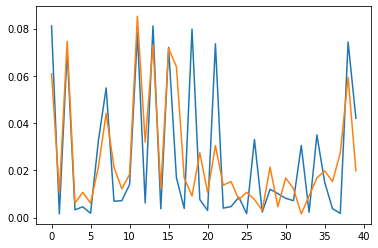

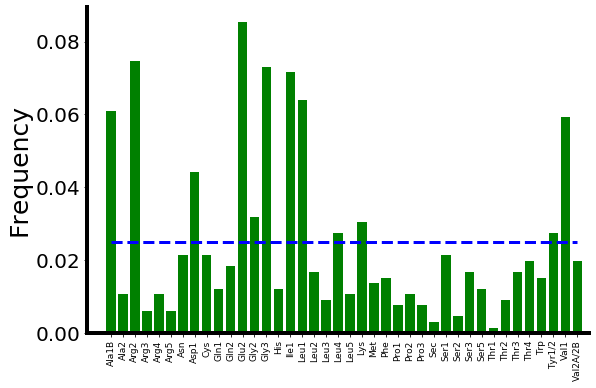

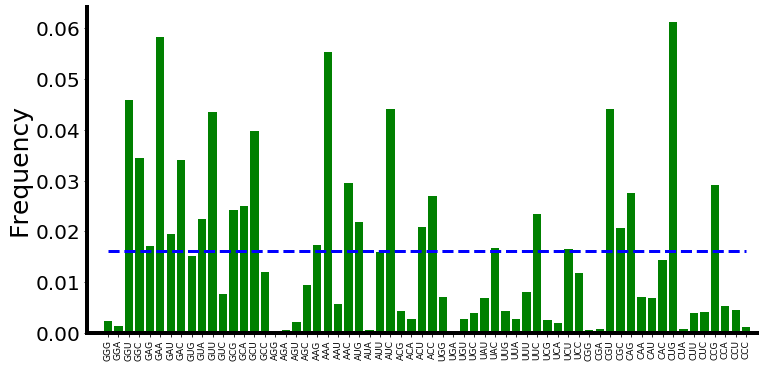

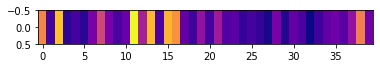

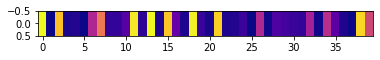

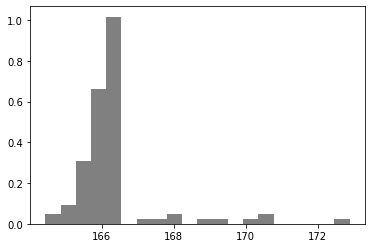

In [558]:
#plot frequency of tRNA vs. codon frequency plot for the new tRNA set vs old

gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)
p_tRNA_list=np.load('RandomtRNA_FixedCodon_1500sample_p_tRNA_list.npy')
elong_t_tRNA_list=np.load('RandomtRNA_FixedCodon_1500sample_elong_t_list.npy')

tRNA_tags = ["Ala1B", "Ala2", "Arg2", "Arg3", "Arg4", "Arg5", "Asn", "Asp1", "Cys", "Gln1", "Gln2", \
"Glu2", "Gly2", "Gly3", "His", "Ile1", "Leu1", "Leu2", "Leu3", "Leu4", "Leu5", "Lys", \
"Met", "Phe", "Pro1", "Pro2", "Pro3", "Sec", "Ser1", "Ser2", "Ser3", "Ser5", "Thr1", \
"Thr2", "Thr3", "Thr4", "Trp", "Tyr1/2", "Val1", "Val2A/2B"]

gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
codon_tags = ['GGG', 'GGA', 'GGU', 'GGC', 'GAG', 'GAA', 'GAU', 'GAC', 'GUG', 'GUA', 'GUU', 'GUC', 'GCG', 'GCA', 'GCU', 'GCC', 'AGG', 'AGA', 'AGU', 'AGC', 'AAG', 'AAA', 'AAU', 'AAC', 'AUG', 'AUA', 'AUU', 'AUC', 'ACG', 'ACA', 'ACU', 'ACC', 'UGG', 'UGA', 'UGU', 'UGC', 'UAU', 'UAC', 'UUG', 'UUA', 'UUU', 'UUC', 'UCG', 'UCA', 'UCU', 'UCC', 'CGG', 'CGA', 'CGU', 'CGC', 'CAG', 'CAA', 'CAU', 'CAC', 'CUG', 'CUA', 'CUU', 'CUC', 'CCG', 'CCA', 'CCU', 'CCC']

print(gr25_ptRNA)
print(p_tRNA_list[np.argmin(elong_t_tRNA_list)])

plt.plot(np.arange(40),p_tRNA_list[np.argmin(elong_t_tRNA_list)])
plt.plot(np.arange(40),gr25_ptRNA)

#fig,ax0 = plt.subplots()
#ax0.bar(np.arange(40),p_tRNA_list[np.argmin(elong_t_tRNA_list)])
fig,ax0 = plt.subplots(figsize=(9,6))
ax0.bar(np.arange(40),gr25_ptRNA,color='green',width=0.8)
ax0.plot(np.arange(40),[1/40]*40,color='blue',linewidth=3,linestyle='dashed')
plt.xticks(range(len(tRNA_tags)), tRNA_tags,rotation='vertical')
ax0.set_xlim(-2,40)

fig,ax = plt.subplots(figsize=(12,6))
ax.bar(np.arange(62),gr25_pCodon,color='green',width=0.8)
ax.plot(np.arange(62),[1/62]*62,color='blue',linewidth=3,linestyle='dashed')
plt.xticks(range(len(codon_tags)), codon_tags,rotation='vertical')
ax.set_xlim(-2,62)
tRNA_dist = (p_tRNA_list[np.argmin(elong_t_tRNA_list)] - gr25_ptRNA)
print(tRNA_dist)
print(sum(tRNA_dist))

tRNA_dist_norm = sum(np.abs(tRNA_dist)) ## Show plot of this too with epoch? With both fitness functions.

print('normed tRNA dist ', tRNA_dist_norm)

print(min(elong_t_tRNA_list))
plt.figure()
plt.imshow(gr25_ptRNA[np.newaxis,:],aspect=4,cmap='plasma')
plt.figure()
plt.imshow(p_tRNA_list[np.argmin(elong_t_tRNA_list)][np.newaxis,:],aspect=3,cmap='plasma')

fig,ax1 = plt.subplots(1,1)
hist=ax1.hist(elong_t_tRNA_list,20,color='grey',density=True)

for ax in [ax0,ax]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=9)
    ax.set_ylabel('Frequency',fontsize=25)

## Is there a correlation betweeen tRNA and codon frequencies? If so,
## can I rationally design a steeper slope to get faster elong rate?
#

In [618]:
###### Genetic algorithm for just codon shuffling ########

def run_ga_CodonSweep(tRNA_arr,elong_arr,codon_arr,gr_dict,minRange,maxRange):
    
    #### Compute fitness
    fitness = (1/np.array(elong_arr))/sum((1/np.array(elong_arr)))

    #### Number of candidates n removing as well as n mating to create n offspring
    n = 10

    #### Identify the least fit candidates from the population
    cull_indices = np.argpartition(fitness, n)[:n]

    #### Choose parents based on weighting fitness
    import random
    #parent_indices = np.array(random.choices(np.arange(len(p_tRNA_list)), fitness, k=10))
    parent_indices = np.argpartition(fitness, n)[-n:]
    codon_arr=np.array(codon_arr)
    parents = codon_arr[parent_indices]

    #### Mate k random pairs of 2 without replacement and renormalize
    k=5
    couples = np.random.choice(np.arange(len(parents)), size = (k,2),replace=False)
    recombination_rate = 0.1
    mutation_rate  = 0.05

    recombined_children = list()
    recombined_children_elongt = list()
    for couple_index in couples:
        couple = parents[couple_index]
        recombination_num = int(len(couple[0])*recombination_rate)
        recombination_locs = np.random.choice(len(couple[0]),recombination_num)
        recombination_values_0 = couple[0][recombination_locs] 
        couple[0][recombination_locs] = couple[1][recombination_locs]
        couple[1][recombination_locs] = recombination_values_0
        
        #### Mutate children
        mutation_num = int(len(couple[0])*mutation_rate)
        recombination_locs = np.random.choice(len(couple[0]),mutation_num)
        couple[0][recombination_locs] = np.random.uniform(minRange,maxRange,mutation_num)
        couple[1][recombination_locs] = np.random.uniform(minRange,maxRange,mutation_num)
        
        ### Re-normalize each recombined children
        child_0 = couple[0]/np.sum(couple[0])
        child_1 = couple[1]/np.sum(couple[1])

        #### Compute elong_t of the recombined children
        elong_t_0, std_0 = computedElongationLatency_gr3_v2(tRNA_arr,child_0,gr_dict);
        elong_t_1, std_1 = computedElongationLatency_gr3_v2(tRNA_arr,child_1,gr_dict);
                

        ### Add children to list as well as their elong_t
        recombined_children.append(list(child_0))
        recombined_children.append(list(child_1))
        recombined_children_elongt.append(elong_t_0[0])
        recombined_children_elongt.append(elong_t_1[0])

    #### Have recombined children and their elong_t replaced culled candidates
    codon_arr[cull_indices] = recombined_children
    elong_arr[cull_indices] = recombined_children_elongt
    return fitness, codon_arr, elong_arr

    

In [541]:
%%time
### tRNA array fixed, codon varying
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)
elong_t_codon_list = np.load('FixedtRNA_RandomCodon_100sample_elong_t_list.npy')
p_Codon_list = np.load('FixedtRNA_RandomCodon_100sample_p_Codon_list.npy')


fitness_arr = list()
minelong_arr = list()
for i in range(2000):
    fitness, p_Codon_list, elong_t_Codon_list = run_ga_CodonSweep(gr25_ptRNA,elong_t_codon_list,p_Codon_list,gr_dict,min(gr25_pCodon),max(gr25_pCodon))
    print(max(fitness))
    print(min(elong_t_Codon_list))
    fitness_arr.append(max(fitness))
    minelong_arr.append(min(elong_t_Codon_list))
#np.save('FixedtRNA_RandomCodon_2000sample_elong_t_list',elong_t_Codon_list)
#np.save('FixedtRNA_RandomCodon_2000sample_p_tRNA_list',p_Codon_list)
#np.save('minelong_arr2-RandomCodon',minelong_arr)

0.010364536294826239
199.16385741771037
0.010332740617422509
199.16385741771037
0.010310362625841842
199.16385741771037
0.01030548643654751
195.3661131256836
0.010496474428191727
194.1132012956428
0.010532967917836167
194.1132012956428
0.010518846679519541
166.88410484846003
0.012180422983012033
166.88410484846003
0.012159510700477655
166.88410484846003
0.01215208193447755
166.88410484846003
0.012109078921458195
166.88410484846003
0.012100767531709687
166.88410484846003
0.01204697186959195
166.88410484846003
0.012025226619128198
166.88410484846003
0.011911739918362104
166.88410484846003
0.011859325392620669
166.88410484846003
0.011785735343732713
160.44504015707128
0.01218043210096253
158.1039995683334
0.012269789743366432
158.1039995683334
0.012198952097811135
158.1039995683334
0.0121314323091924
158.1039995683334
0.012058646241170447
158.1039995683334
0.012017159208881077
158.1039995683334
0.011942561712475834
158.1039995683334
0.011872065138924985
158.1039995683334
0.011797503279735

0.01052679231612393
144.23284147894688
0.010510995444908135
143.36062302617233
0.010575904318878289
143.36062302617233
0.01057842409534514
143.36062302617233
0.010556528047354791
143.36062302617233
0.010550465636533538
143.36062302617233
0.010519031597620063
143.36062302617233
0.010516798315937792
143.36062302617233
0.01052186188859253
143.36062302617233
0.01050929890630144
143.36062302617233
0.01049681256447766
143.36062302617233
0.0104990445517438
143.36062302617233
0.010494106431652633
143.36062302617233
0.010501195581476941
143.36062302617233
0.010483473719053655
143.36062302617233
0.0104914795369092
143.36062302617233
0.010485080535762574
143.36062302617233
0.010459168531210445
143.36062302617233
0.010468778738971783
143.36062302617233
0.010454534297106329
143.36062302617233
0.010468877224211066
143.36062302617233
0.01045022805745526
143.36062302617233
0.010456864214313242
143.36062302617233
0.01044277212904829
143.36062302617233
0.010437089449844254
143.36062302617233
0.010443337

0.010332407824077093
141.99589614614447
0.010331603445932922
141.99589614614447
0.010359666984767292
141.99589614614447
0.01034454736368694
141.99589614614447
0.010357045698094607
141.99589614614447
0.010346154116634372
141.99589614614447
0.010357453525680958
141.99589614614447
0.010338856840906735
141.99589614614447
0.010345050363915346
141.99589614614447
0.010348433480765102
141.99589614614447
0.010349169666685634
141.99589614614447
0.010352668816536903
141.99589614614447
0.010354393034753806
141.99589614614447
0.010343178159772905
141.99589614614447
0.010338780060602609
141.99589614614447
0.010332511538948782
141.99589614614447
0.010351783804316868
141.99589614614447
0.010351146524132472
141.99589614614447
0.010339958453063135
141.99589614614447
0.010363080965615026
141.99589614614447
0.01036150744548424
141.99589614614447
0.010345397748440373
141.99589614614447
0.010346119666037499
141.99589614614447
0.010356857168428305
141.99589614614447
0.01034383463280699
141.99589614614447
0.0

0.010279635593947987
140.5877520162427
0.010298395428245352
140.5877520162427
0.01029036208047442
140.5877520162427
0.010286201153915082
140.5877520162427
0.010279044476874511
140.5877520162427
0.010284309887796942
140.5877520162427
0.010262422478769438
140.5877520162427
0.010280481861746835
140.5877520162427
0.010285668082948202
140.5877520162427
0.010285669166972735
140.5877520162427
0.01027194011663248
140.5877520162427
0.01027697501146035
140.5877520162427
0.010283918303535257
140.5877520162427
0.010273376346492438
140.5877520162427
0.01029047358158703
140.5877520162427
0.010263266824087321
140.5877520162427
0.010273219401752715
140.5877520162427
0.010285145788412865
140.5877520162427
0.010275996841506898
140.5877520162427
0.010292267868969692
140.5877520162427
0.010268139410448296
140.5877520162427
0.010273660748105389
140.5877520162427
0.010288263879925352
140.5877520162427
0.010276716440352359
140.5877520162427
0.010284054090030638
140.5877520162427
0.010266766768513172
140.5877

0.010274814115844575
140.14374086052044
0.010278029394491043
140.14374086052044
0.010269176350026079
140.14374086052044
0.010284030574886797
140.14374086052044
0.010278790839721219
140.14374086052044
0.01027511841388697
140.14374086052044
0.010279742760945546
140.14374086052044
0.01027658309383426
140.14374086052044
0.010270755001167415
140.14374086052044
0.010282537083668873
140.14374086052044
0.01027778893110814
140.14374086052044
0.010279026945395231
140.14374086052044
0.010271041689066665
140.14374086052044
0.010274256139708556
140.14374086052044
0.010272512426695373
140.14374086052044
0.010273416351119915
140.14374086052044
0.01027389609996786
140.14374086052044
0.010277550111548815
140.14374086052044
0.010275247500119952
140.14374086052044
0.01027039554826794
140.14374086052044
0.01027778949459225
140.14374086052044
0.010267589829054678
140.14374086052044
0.010276035134975292
140.14374086052044
0.010266133682736139
140.14374086052044
0.010265293758513707
140.14374086052044
0.0102

0.010342616477703051
138.38372583198628
0.010351851501413815
138.38372583198628
0.010347966327852806
138.38372583198628
0.010331611187440434
138.38372583198628
0.0103498447232634
138.38372583198628
0.01035868604694048
138.38372583198628
0.010350263518645706
138.38372583198628
0.010355142912782068
138.38372583198628
0.010341300388576499
138.38372583198628
0.01033255051445569
138.38372583198628
0.010352364842406783
138.38372583198628
0.010352419340251677
138.38372583198628
0.010343932948015708
138.38372583198628
0.010351018653538482
138.38372583198628
0.010341799427468292
138.38372583198628
0.010350169959375153
138.38372583198628
0.010346582940193914
138.38372583198628
0.010348269183749486
138.38372583198628
0.010323320109390674
138.38372583198628
0.010362448852662113
138.38372583198628
0.010345872791613751
138.38372583198628
0.01033447238447594
138.38372583198628
0.010339564079648587
138.38372583198628
0.01033452871910762
138.38372583198628
0.010339791625524602
138.38372583198628
0.0103

0.0103220895746682
138.01442478117977
0.010331004104309718
138.01442478117977
0.01032488384223317
138.01442478117977
0.010313499823577212
138.01442478117977
0.01032193911608015
138.01442478117977
0.010304502937264455
138.01442478117977
0.010308052218197654
138.01442478117977
0.010307937959710519
138.01442478117977
0.010324316232949302
138.01442478117977
0.0103177166530393
138.01442478117977
0.010303288115017682
138.01442478117977
0.010307788896958775
138.01442478117977
0.010315679319099054
138.01442478117977
0.010311684820074295
138.01442478117977
0.010315832940694615
138.01442478117977
0.010306307456803353
138.01442478117977
0.010323473023340952
138.01442478117977
0.01030484481030191
138.01442478117977
0.010309580635228004
138.01442478117977
0.01030973137187729
138.01442478117977
0.010311647323584154
138.01442478117977
0.010324986609625357
138.01442478117977
0.010321343301037747
138.01442478117977
0.010308184333589059
138.01442478117977
0.010300365614060992
138.01442478117977
0.010301

0.010319000346511547
136.08665036082328
0.010324519472201647
136.08665036082328
0.010311361547588037
136.08665036082328
0.010319785805213198
136.08665036082328
0.010329052519876595
136.08665036082328
0.01030875646534101
136.08665036082328
0.010326308172321486
136.08665036082328
0.010311124233328663
136.08665036082328
0.010309797330827755
136.08665036082328
0.0103427695693383
136.08665036082328
0.010299005688157756
136.08665036082328
0.010309129279277915
136.08665036082328
0.01030473844649452
136.08665036082328
0.0103090155874241
136.08665036082328
0.010295826870101728
136.08665036082328
0.010298368146439398
136.08665036082328
0.010315109814805089
136.08665036082328
0.010287321275876244
136.08665036082328
0.010281938134302667
136.08665036082328
0.010293901114953003
136.08665036082328
0.010304084316984619
136.08665036082328
0.010308320141025304
136.08665036082328
0.01029812474351545
136.08665036082328
0.010303072077738269
136.08665036082328
0.010284286168391861
136.08665036082328
0.01030

0.01041122877927061
133.38889781633964
0.010410793323532907
133.38889781633964
0.010409208148428509
133.38889781633964
0.010400810023780143
133.38889781633964
0.010414341400453794
133.38889781633964
0.010418468427959668
133.38889781633964
0.010406344424090467
133.38889781633964
0.01040574833142523
133.38889781633964
0.010427227250345793
133.38889781633964
0.010418880963964644
133.38889781633964
0.010424103635356652
133.38889781633964
0.010400416511208736
133.38889781633964
0.010401088028964967
133.38889781633964
0.010395763285029537
133.38889781633964
0.010405416165309976
133.38889781633964
0.01040807043872876
133.38889781633964
0.010402755525327182
133.38889781633964
0.010411321098964813
133.38889781633964
0.0103926134409796
133.38889781633964
0.010407646887341237
133.38889781633964
0.010402962804961696
133.38889781633964
0.010402347213111836
133.38889781633964
0.010402484464688498
133.38889781633964
0.010396745658954954
133.38889781633964
0.010389148472542166
133.38889781633964
0.010

0.010358600631142622
133.38889781633964
0.010363025658780467
133.38889781633964
0.01033871041962257
133.38889781633964
0.010350967649418532
133.38889781633964
0.010349901368157268
133.38889781633964
0.010336071573160374
133.38889781633964
0.01034340995675335
133.38889781633964
0.010360728657178074
133.38889781633964
0.010326070135347674
133.38889781633964
0.010344803333212995
133.38889781633964
0.01034188608231043
133.38889781633964
0.010341731206346195
133.38889781633964
0.010345821393506656
133.38889781633964
0.010368820447857884
133.38889781633964
0.010350861710951464
133.38889781633964
0.010346021326546754
133.38889781633964
0.01032351645190267
133.38889781633964
0.010322028401323912
133.38889781633964
0.010324331032611385
133.38889781633964
0.010328400433481252
133.38889781633964
0.010335950204681926
133.38889781633964
0.010342060767710047
133.38889781633964
0.010348939799582589
133.38889781633964
0.010320952934962536
133.38889781633964
0.010337598850989246
133.38889781633964
0.01

133.38889781633964
[8.53864095e-03 8.07443615e-06 5.65977613e-02 1.77939046e-04
 9.05840505e-02 3.66515968e-01 3.71278049e-03 4.52985324e-10
 2.06038244e-03 4.11397149e-03 1.96955800e-03 5.93306202e-05
 2.52283178e-02 4.06775130e-04 7.57304470e-03 6.43298202e-05
 3.22666500e-05 1.93933268e-04 1.66776391e-05 4.10394480e-05
 7.18008022e-03 1.70455281e-02 6.90183099e-05 4.63394184e-05
 5.85231262e-03 4.39965931e-02 3.35732508e-02 3.53574587e-04
 4.59994426e-03 1.19528818e-05 5.08997523e-05 5.16918672e-05
 8.95209409e-05 4.03623983e-05 8.18950577e-05 4.43661748e-03
 9.71751016e-03 3.99228105e-04 6.50270035e-04 5.51614055e-09
 1.23158211e-04 2.29555578e-04 2.10467030e-03 1.65632675e-04
 5.45453407e-04 2.40261503e-04 1.57611952e-04 5.35549479e-02
 3.97652951e-04 2.37741713e-01 1.18226109e-03 2.85491248e-04
 6.47298261e-04 6.86314998e-04 1.17325384e-05 8.66371244e-05
 2.92935504e-07 3.82917716e-03 6.86508878e-05 1.48574648e-03
 2.30386726e-06 3.11998020e-04]
[ 6.16066344e-03 -1.26152373e-03  

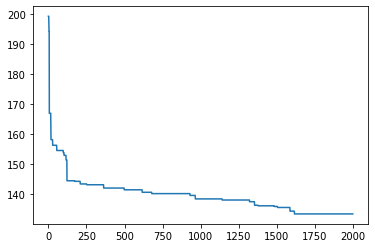

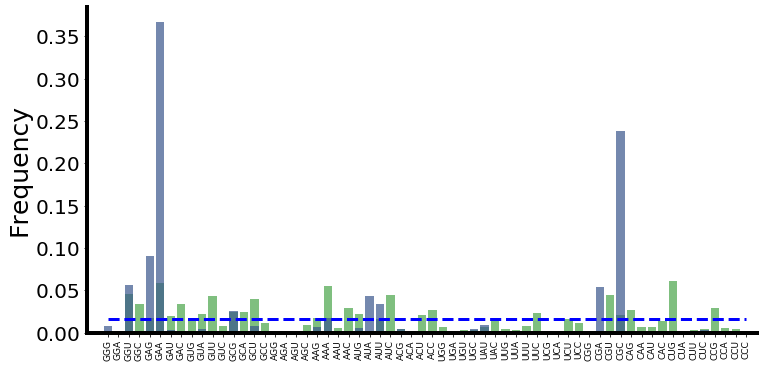

In [601]:
plt.plot(minelong_arr)
print(min(elong_t_Codon_list))
print(p_Codon_list[np.argmin(elong_t_Codon_list)])

p_Codon_list = np.load('FixedtRNA_RandomCodon_2000sample_p_tRNA_list.npy')
elong_t_Codon_list = np.load('FixedtRNA_RandomCodon_2000sample_elong_t_list.npy')


fig,ax = plt.subplots(figsize=(12,6))
ax.bar(np.arange(62),gr25_pCodon,color='green',width=0.8,alpha=0.5)
ax.bar(np.arange(62),p_Codon_list[np.argmin(elong_t_Codon_list)],color='#39568CFF',width=0.8,alpha=0.7)
ax.plot(np.arange(62),[1/62]*62,color='blue',linewidth=3,linestyle='dashed')
plt.xticks(range(len(codon_tags)), codon_tags,rotation='vertical')
ax.set_xlim(-2,62)
codon_dist = (p_Codon_list[np.argmin(elong_t_Codon_list)] - gr25_pCodon)
print(codon_dist)
print(sum(codon_dist))

tRNA_dist_norm = sum(np.abs(tRNA_dist)) ## Show plot of this too with epoch? With both fitness functions.

print('normed tRNA dist ', tRNA_dist_norm)

for ax in [ax]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=9)
    ax.set_ylabel('Frequency',fontsize=25)

[ 0.0320806  -0.00123449  0.00191738 -0.0044452  -0.00643069 -0.00383503
 -0.01834048  0.02917315 -0.01790866 -0.01052274 -0.01305622 -0.00900401
 -0.02700192  0.00678252 -0.00792754  0.00107333 -0.05109695 -0.01504611
  0.0513426  -0.02357885  0.00139892  0.05732696 -0.01003801 -0.01118776
 -0.0061273  -0.00837635  0.03940517  0.00115783 -0.00804593  0.00108296
 -0.00841009 -0.00700088  0.01900747 -0.00355713  0.01228146 -0.01780911
 -0.00794799 -0.00086069  0.00951354  0.03524624]
1.3183898417423734e-16
normed tRNA dist  0.5975802800529858


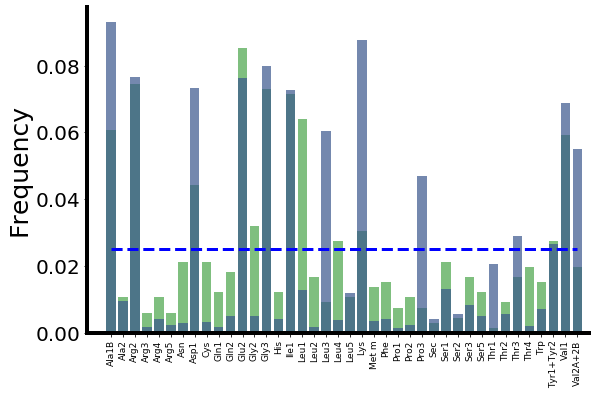

In [602]:
p_tRNA_list = np.load('RandomtRNA_FixedCodon_1500sample_p_tRNA_list2.npy')
elong_t_tRNA_list = np.load('RandomtRNA_FixedCodon_1500sample_elong_t_list2.npy')
tRNA_tags = ['Ala1B', 'Ala2', 'Arg2', 'Arg3', 'Arg4', 'Arg5', 'Asn', 'Asp1', 'Cys', 'Gln1', 'Gln2', 'Glu2', 'Gly2', 'Gly3', 'His', 'Ile1', 'Leu1', 'Leu2', 'Leu3', 'Leu4', 'Leu5', 'Lys', 'Met m', 'Phe', 'Pro1', 'Pro2', 'Pro3', 'Sec', 'Ser1', 'Ser2', 'Ser3', 'Ser5', 'Thr1', 'Thr2', 'Thr3', 'Thr4', 'Trp', 'Tyr1+Tyr2', 'Val1', 'Val2A+2B']



fig,ax = plt.subplots(figsize=(9,6))
ax.bar(np.arange(40),gr25_ptRNA,color='green',width=0.8,alpha=0.5)
ax.bar(np.arange(40),p_tRNA_list[np.argmin(elong_t_tRNA_list)],color='#39568CFF',width=0.8,alpha=0.7)
ax.plot(np.arange(40),[1/40]*40,color='blue',linewidth=3,linestyle='dashed')
plt.xticks(range(len(tRNA_tags)), tRNA_tags,rotation='vertical')
ax.set_xlim(-2,40)
tRNA_dist = (p_tRNA_list[np.argmin(elong_t_tRNA_list)] - gr25_ptRNA)
print(tRNA_dist)
print(sum(tRNA_dist))

tRNA_dist_norm = sum(np.abs(tRNA_dist)) ## Show plot of this too with epoch? With both fitness functions.

print('normed tRNA dist ', tRNA_dist_norm)

for ax in [ax]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=9)
    ax.set_ylabel('Frequency',fontsize=25)

In [664]:
###### Genetic algorithm for tRNA &  codon shuffling ########

def run_ga_tRNACodonSweep(combined_arr,elong_arr,gr_dict,minRangetRNA,maxRangetRNA,minRangeCodon,maxRangeCodon):
    
    #### Compute fitness
    fitness = (1/np.array(elong_arr))/sum((1/np.array(elong_arr)))

    #### Number of candidates n removing as well as n mating to create n offspring
    n = 10

    #### Identify the least fit candidates from the population
    cull_indices = np.argpartition(fitness, n)[:n]

    #### Choose parents based on weighting fitness
    import random
    #parent_indices = np.array(random.choices(np.arange(len(p_tRNA_list)), fitness, k=10))
    parent_indices = np.argpartition(fitness, n)[-n:]
    combined_arr=np.array(combined_arr)
    parents = combined_arr[parent_indices]
    #### Mate k random pairs of 2 without replacement and renormalize
    k=5
    couples = np.random.choice(np.arange(len(parents)), size = (k,2),replace=False)
    recombination_rate = 0.1
    mutation_rate  = 0.05

    recombined_children = list()
    recombined_children_elongt = list()
    for couple_index in couples:
        couple = parents[couple_index]
        recombination_num = int(len(couple[0])*recombination_rate)
        recombination_locs = np.random.choice(len(couple[0]),recombination_num)
        recombination_values_0 = couple[0][recombination_locs] 
        couple[0][recombination_locs] = couple[1][recombination_locs]
        couple[1][recombination_locs] = recombination_values_0
        
        #### Mutate children
        mutation_num = int(len(couple[0])*mutation_rate)
        recombination_locs = np.random.choice(np.arange(40),mutation_num)
        couple[0][recombination_locs] = np.random.uniform(minRangetRNA,maxRangetRNA,mutation_num)
        couple[1][recombination_locs] = np.random.uniform(minRangetRNA,maxRangetRNA,mutation_num)
        
        recombination_locs = np.random.choice(np.arange(40,102),mutation_num)
        couple[0][recombination_locs] = np.random.uniform(minRangeCodon,maxRangeCodon,mutation_num)
        couple[1][recombination_locs] = np.random.uniform(minRangeCodon,maxRangeCodon,mutation_num)
        
        ### Re-normalize each recombined children
        child_0 = couple[0]/np.sum(couple[0])
        child_1 = couple[1]/np.sum(couple[1])

        #### Compute elong_t of the recombined children
        elong_t_0, std_0 = computedElongationLatency_gr3_v2(child_0[0:40],child_0[40:102],gr_dict);
        elong_t_1, std_1 = computedElongationLatency_gr3_v2(child_1[0:40],child_1[40:102],gr_dict);
                

        ### Add children to list as well as their elong_t
        recombined_children.append(list(child_0))
        recombined_children.append(list(child_1))
        recombined_children_elongt.append(elong_t_0[0])
        recombined_children_elongt.append(elong_t_1[0])

    #### Have recombined children and their elong_t replaced culled candidates
    combined_arr[cull_indices] = recombined_children
    elong_arr[cull_indices] = recombined_children_elongt
    return fitness, combined_arr, elong_arr

In [669]:
### tRNA varying codon varying
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)
elong_t_codon_list = np.load('FixedtRNA_RandomCodon_100sample_elong_t_list.npy')
p_Codon_list = np.load('FixedtRNA_RandomCodon_100sample_p_Codon_list.npy')

elong_arr = np.load('RandomtRNA_RandomCodon_100sample_elong_t_list.npy')
p_Codon_list = np.load('RandomtRNA_RandomCodon_100sample_p_Codon_list.npy')
p_tRNA_list = np.load('RandomtRNA_RandomCodon_100sample_p_tRNA_list.npy')

combined_arr = [np.append(p_tRNA_list[i], p_Codon_list[i]) for i in np.arange(len(p_tRNA_list))]
fitness_arr = list()
minelong_arr = list()
for i in range(10):
    fitness, combined_arr, elong_arr = run_ga_tRNACodonSweep(combined_arr,elong_arr,gr_dict,min(gr25_ptRNA),max(gr25_ptRNA),min(gr25_pCodon),max(gr25_pCodon))
    print(max(fitness))
    print(min(elong_arr))
    fitness_arr.append(max(fitness))
    minelong_arr.append(min(elong_arr))
np.save('RandomtRNA_RandomCodon_1500sample_elong_t_list',elong_t_Codon_list)
np.save('RandomtRNA_RandomCodon_1500sample_p_tRNA_list',p_Codon_list)
np.save('minelong_arr2-RandomCodonRandomCodon_1500sample',minelong_arr)

100
0.010340239371996478
204.00086933795282
100
0.010306462848391082
204.00086933795282
100
0.010286770663308447
180.97334532336862
100
0.011568731856928997
180.97334532336862
100
0.011594023556472271
180.97334532336862
100
0.011564079694598498
180.97334532336862
100
0.011547115791043205
180.97334532336862
100
0.01156993693159276
180.97334532336862
100
0.01153345187534506
180.97334532336862
100
0.011515930268551883
180.97334532336862


R^2 0.4232403135634091
1.0015378565230553


(0, 0.12)

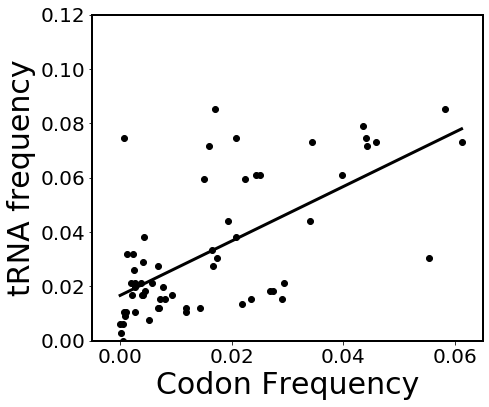

In [584]:
#### trna frequency vs codon frequency, baseline
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
%matplotlib inline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)


ptRNA_dict, pcodon_dict, codon_dict, codon_labels, pCodon = cognateDistrib(gr25_ptRNA,gr25_pCodon,True)

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]
#print(codonp_sorted)

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]
codon_tRNA_sorted_p = [sum(ptRNA_dict[tRNA] for tRNA in codon_dict[codon]) for codon in codonp_sorted_codon]
#ax2 = ax.twinx()
fig,ax = plt.subplots(figsize=(7,6))
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)

ax.scatter(codonp_sorted_p,codon_tRNA_sorted_p,color='black',label = 'Protein-coding codon')
ax.set_xlabel('Codon Frequency',fontsize=30)
ax.set_ylabel('tRNA frequency',fontsize=30)
ax.set_xlim(-0.005,0.065)


def calc_R2(x,y,y_hat):
    SS_err = np.sum((y-y_hat)**2) # Sum of squared errors
    SS_tot = np.sum((y-np.average(y))**2) #Sum of squares total (proportional to variance; n times larger than variance)
    return 1-SS_err/SS_tot

y_model,SS_err,_,_,_ = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1,full=True)
y_hat = np.polyval(y_model,codonp_sorted_p)
x_sweep_i = np.linspace(min(codonp_sorted_p),max(codonp_sorted_p),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax.plot(x_sweep_i,y_hat_sweep_i,linewidth=3,color='black')
print("R^2",calc_R2(codonp_sorted_p,codon_tRNA_sorted_p,y_hat))

slope, intercept = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1)
print(slope)

ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.set_ylim(0,0.12)

R^2 0.4535735141207978
1.4815153405113408


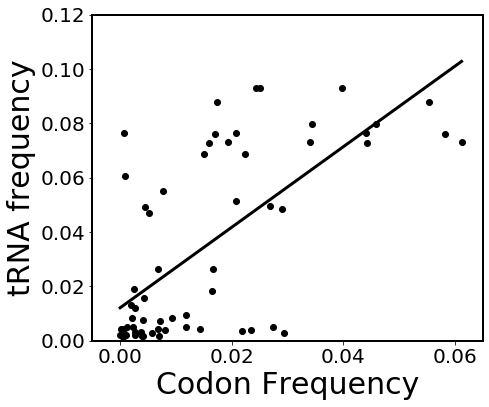

In [596]:
#### trna frequency vs codon frequency, ga faster (tRNA random, codon fixed)
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
%matplotlib inline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)

p_tRNA_list = np.load('RandomtRNA_FixedCodon_1500sample_p_tRNA_list2.npy')
elong_t_tRNA_list = np.load('RandomtRNA_FixedCodon_1500sample_elong_t_list2.npy')

ptRNA_dict, pcodon_dict, codon_dict, codon_labels, pCodon = cognateDistrib(p_tRNA_list[np.argmin(elong_t_tRNA_list)],gr25_pCodon,True)

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]
#print(codonp_sorted)

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]
codon_tRNA_sorted_p = [sum(ptRNA_dict[tRNA] for tRNA in codon_dict[codon]) for codon in codonp_sorted_codon]
#ax2 = ax.twinx()
fig,ax = plt.subplots(figsize=(7,6))
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)

ax.scatter(codonp_sorted_p,codon_tRNA_sorted_p,color='black',label = 'Protein-coding codon')
ax.set_xlabel('Codon Frequency',fontsize=30)
ax.set_ylabel('tRNA frequency',fontsize=30)
ax.set_xlim(-0.005,0.065)


def calc_R2(x,y,y_hat):
    SS_err = np.sum((y-y_hat)**2) # Sum of squared errors
    SS_tot = np.sum((y-np.average(y))**2) #Sum of squares total (proportional to variance; n times larger than variance)
    return 1-SS_err/SS_tot

y_model,SS_err,_,_,_ = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1,full=True)
y_hat = np.polyval(y_model,codonp_sorted_p)
x_sweep_i = np.linspace(min(codonp_sorted_p),max(codonp_sorted_p),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax.plot(x_sweep_i,y_hat_sweep_i,linewidth=3,color='black')
print("R^2",calc_R2(codonp_sorted_p,codon_tRNA_sorted_p,y_hat))

slope, intercept = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1)
print(slope)

ax.set_ylim(0,0.12)


ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

R^2 0.21001698725771456
0.20174522421212648


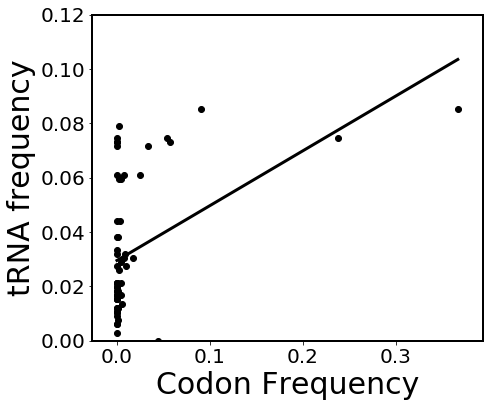

In [582]:
#### trna frequency vs codon frequency, ga faster, tRNA fixed, codon random
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
%matplotlib inline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

p_Codon_list = np.load('FixedtRNA_RandomCodon_2000sample_p_tRNA_list.npy')
elong_t_Codon_list = np.load('FixedtRNA_RandomCodon_2000sample_elong_t_list.npy')

gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)

ptRNA_dict, pcodon_dict, codon_dict, codon_labels, pCodon = cognateDistrib(gr25_ptRNA,p_Codon_list[np.argmin(elong_t_Codon_list)],True)


codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]
#print(codonp_sorted)

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]
codon_tRNA_sorted_p = [sum(ptRNA_dict[tRNA] for tRNA in codon_dict[codon]) for codon in codonp_sorted_codon]
#ax2 = ax.twinx()
fig,ax = plt.subplots(figsize=(7,6))
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)

ax.scatter(codonp_sorted_p,codon_tRNA_sorted_p,color='black',label = 'Protein-coding codon')
ax.set_xlabel('Codon Frequency',fontsize=30)
ax.set_ylabel('tRNA frequency',fontsize=30)
#ax.set_xlim(-0.005,0.065)


def calc_R2(x,y,y_hat):
    SS_err = np.sum((y-y_hat)**2) # Sum of squared errors
    SS_tot = np.sum((y-np.average(y))**2) #Sum of squares total (proportional to variance; n times larger than variance)
    return 1-SS_err/SS_tot

y_model,SS_err,_,_,_ = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1,full=True)
y_hat = np.polyval(y_model,codonp_sorted_p)
x_sweep_i = np.linspace(min(codonp_sorted_p),max(codonp_sorted_p),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax.plot(x_sweep_i,y_hat_sweep_i,linewidth=3,color='black')
print("R^2",calc_R2(codonp_sorted_p,codon_tRNA_sorted_p,y_hat))

slope, intercept = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1)
print(slope)

ax.set_ylim(0,0.12)

ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

R^2 0.06487517128003639
0.2685521347820137


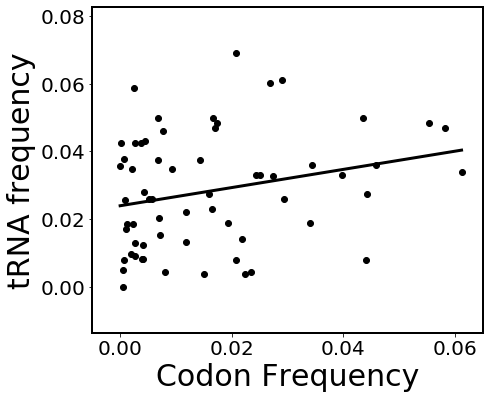

In [451]:
#### trna frequency vs codon frequency, ga faster (trna uniform, codon WT)
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
%matplotlib inline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)
ptRNA_uniform = np.random.uniform(min(gr25_ptRNA),max(gr25_ptRNA),len(gr25_ptRNA))



ptRNA_dict, pcodon_dict, codon_dict, codon_labels, pCodon = cognateDistrib(ptRNA_uniform,gr25_pCodon,True)

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]
#print(codonp_sorted)

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]
codon_tRNA_sorted_p = [sum(ptRNA_dict[tRNA] for tRNA in codon_dict[codon]) for codon in codonp_sorted_codon]
#ax2 = ax.twinx()
fig,ax = plt.subplots(figsize=(7,6))
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)

ax.scatter(codonp_sorted_p,codon_tRNA_sorted_p,color='black',label = 'Protein-coding codon')
ax.set_xlabel('Codon Frequency',fontsize=30)
ax.set_ylabel('tRNA frequency',fontsize=30)
ax.set_xlim(-0.005,0.065)


def calc_R2(x,y,y_hat):
    SS_err = np.sum((y-y_hat)**2) # Sum of squared errors
    SS_tot = np.sum((y-np.average(y))**2) #Sum of squares total (proportional to variance; n times larger than variance)
    return 1-SS_err/SS_tot

y_model,SS_err,_,_,_ = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1,full=True)
y_hat = np.polyval(y_model,codonp_sorted_p)
x_sweep_i = np.linspace(min(codonp_sorted_p),max(codonp_sorted_p),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax.plot(x_sweep_i,y_hat_sweep_i,linewidth=3,color='black')
print("R^2",calc_R2(codonp_sorted_p,codon_tRNA_sorted_p,y_hat))

slope, intercept = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1)
print(slope)


ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)


R^2 0.00013592761235281525
0.021452788246971444


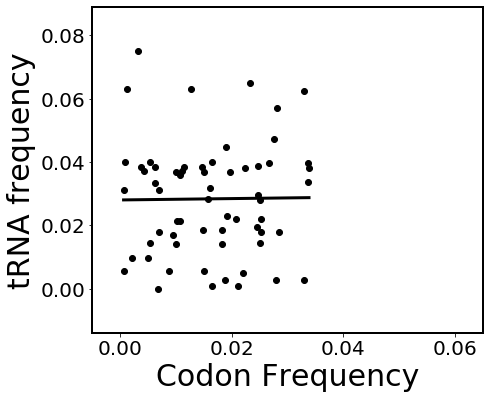

In [616]:
#### trna frequency vs codon frequency, ga faster (trna uniform, codon WT)
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
%matplotlib inline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)
ptRNA_uniform = np.random.uniform(min(gr25_ptRNA),max(gr25_ptRNA),len(gr25_ptRNA))
pCodon_uniform = np.random.uniform(min(gr25_pCodon),max(gr25_pCodon),len(gr25_pCodon))

ptRNA_dict, pcodon_dict, codon_dict, codon_labels, pCodon = cognateDistrib(ptRNA_uniform,pCodon_uniform,True)

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]

codonp_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codonp_sorted_codon = [x[0] for x in codonp_sorted]
codonp_sorted_p = [x[1] for x in codonp_sorted]
#print(codonp_sorted)

codon_tRNA_sorted = [codon_dict[codon] for codon in codonp_sorted_codon]
codon_tRNA_sorted_p = [sum(ptRNA_dict[tRNA] for tRNA in codon_dict[codon]) for codon in codonp_sorted_codon]
#ax2 = ax.twinx()
fig,ax = plt.subplots(figsize=(7,6))
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)

ax.scatter(codonp_sorted_p,codon_tRNA_sorted_p,color='black',label = 'Protein-coding codon')
ax.set_xlabel('Codon Frequency',fontsize=30)
ax.set_ylabel('tRNA frequency',fontsize=30)
ax.set_xlim(-0.005,0.065)


def calc_R2(x,y,y_hat):
    SS_err = np.sum((y-y_hat)**2) # Sum of squared errors
    SS_tot = np.sum((y-np.average(y))**2) #Sum of squares total (proportional to variance; n times larger than variance)
    return 1-SS_err/SS_tot

y_model,SS_err,_,_,_ = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1,full=True)
y_hat = np.polyval(y_model,codonp_sorted_p)
x_sweep_i = np.linspace(min(codonp_sorted_p),max(codonp_sorted_p),1000)
y_hat_sweep_i = np.polyval(y_model, x_sweep_i)
ax.plot(x_sweep_i,y_hat_sweep_i,linewidth=3,color='black')
print("R^2",calc_R2(codonp_sorted_p,codon_tRNA_sorted_p,y_hat))

slope, intercept = np.polyfit(codonp_sorted_p,codon_tRNA_sorted_p,1)
print(slope)


ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)





In [300]:
#np.save('RandomtRNA_RandomCodon_10ksample_p_Codon_tRNA_list',p_Codon_tRNA_list)
#np.save('RandomtRNA_RandomCodon_10ksample_elong_t_list',elong_t_list_codon_tRNA_distrib)

#np.save('FixedtRNA_RandomCodon_10ksample_p_Codon_tRNA_list',p_Codon_list)
#np.save('FixedtRNA_RandomCodon_10ksample_elong_t_list',elong_t_list_codon_distrib)

#np.save('RandomtRNA_FixedCodon_10ksample_p_Codon_tRNA_list',p_tRNA_list)
#np.save('RandomtRNA_FixedCodon_10ksample_elong_t_list',elong_t_tRNA_list)


#np.save('RandomtRNA_FixedCodon_100sample_p_Codon_tRNA_list',p_tRNA_list)
#np.save('RandomtRNA_FixedCodon_100sample_elong_t_list',elong_t_tRNA_list)
